## Model Değerlendirilmesi ve Düzenlenmesi

Daha önceki değerlendirmede üretilmiş olan modelleri ne kadar iyi tahmin yaptığını değerlendirmeye çalışacağız.

In [1]:
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)

In [2]:
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
# Bu dataset içerisinden sadece sayısal verileri değerlendirmeye alacağız. 
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


***Grafikler için gerekli olan libraryleri yükleyeceğiz***
  

In [4]:
%%capture
! pip install ipywidgets

In [5]:
from IPython.display import display
from IPython.html import widgets
from ipywidgets import interact, interactive, fixed, interact_manual

C:\Users\evren\AppData\Roaming\Python\Python37\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


***Grafik için gerekli olan fonksiyonlar*** 

In [6]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [7]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

İlk olarak veri içerisinde tahmin yapmak istediğimiz "price" verisini ayırıp bir seri içerisinde sakıyoruz. Sonrasında ise dataframe içerisinden "price" kolonunu siliyoruz.

In [8]:
y_data=df["price"]
x_data=df.drop("price",axis=1)

***train_test_split*** fonksiyonunu kullanarak verimizi eğitim ce test verisi olarak ikiye ayırıyoruz. Burada ayrım işini random yapacağız.

In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.15,random_state=1)

print("Test örneği sayısı :",x_test.shape[0])
print("Eğitim örneği sayısı :",x_train.shape[0])

Test örneği sayısı : 31
Eğitim örneği sayısı : 170


LinearRegression  import edeceğiz linear_model modelinden

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
#Linear  Regression object yaratalım.
lre=LinearRegression()

"horsepower" ile "price" arasındaki ilişkiyi analiz edecek bir model oluşturalım.

In [12]:
lre.fit(x_train[["horsepower"]],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#Test datası üzerindeki R^2 değerini hesaplayalım.
lre.score(x_test[["horsepower"]],y_test)

0.707688374146705

In [14]:
#Eğitim veri seti üzerinden R^2 değerini hesaplayalım.
lre.score(x_train[["horsepower"]],y_train)

0.6449517437659684

Bu iki sonuçtan test datası r-square değerinin daha iyi olduğunu görüyoruz.

***Cross Validation Score***

Bunun için <code>sklearn.model_selection</code> içerisinden <code>cross_val_score</code> modülünü import edeceğiz.

In [15]:
from sklearn.model_selection import cross_val_score

Daha önce yaratmış olduğumuz ***lre*** objesini yine kullanacağız. "horsepower" ile "price" arasındaki ilişkiyi inceleyeceğiz. Cross Validation değerini hesaplatmak için veriyi 4 fold (bölüme) ayıracağız. 3 bölümü train 1 bölümü test olmak üzere. Cross Validation sayesinde her bölüm en azından bir kere test verisi olarak kullanılacak. 

In [16]:
Rcross=cross_val_score(lre,x_data[["horsepower"]],y_data,cv=4)

In [17]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

Varsayılan olarak burada her durum için hesaplanmış R^2 değerleri görünüyor. Genellikle bunların ortalaması alınarak değerlendirmeye alınır.

In [18]:
print("Tüm bölümler için ortalama ", Rcross.mean(), "ve standart sapma" , Rcross.std())

Tüm bölümler için ortalama  0.522009915042119 ve standart sapma 0.2911839444756029


Aynı fonksiyon ile "negative squared error" değerini de hesaplatıp kullanabiliriz. Bunun için "scoring" parametresine "neg_mean_squared_error" değerini veririz.

In [19]:
-1*cross_val_score(lre,x_data[["horsepower"]],y_data,cv=4,scoring="neg_mean_squared_error")

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.7224759 ])

Cross Validation ile prediction yapabiliriz. Bunun için <code>sklearn.model_selection</code> içerisinden <code>cross_val_predict</code> fonksiyonunu import ederiz.

In [20]:
from sklearn.model_selection import cross_val_predict

In [21]:
yhat=cross_val_predict(lre,x_data[["horsepower"]],y_data,cv=4)
yhat[0:4]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306])

# Overfitting, Underfitting ve Model Seçimi

Bazı durumdalarda test ve eğitim verilerimizdeki skorlar ile gerçek verilerdeki tahmin skorlarımız arasındaki fark çok fazla olabilir. Eğitim ve testte çok iyi sonuç veren bir model gerçek hayatta o kadar iyi bir sonuç vermeyebilir. Bu durumda modelinizin overfit (aşırı uydurma) ettiğini düşünebilirsiniz. 

***Overfitting*** modelin veri üzerindeki temel davranışı belirleyen sistematiklere değil gürültülere adapte olduğunda ortaya çıkar.

In [22]:
# Overfitting durumunu test etmek için MultipleLinear Regression yapacağız. 
lr=LinearRegression()
lr.fit(x_train[["horsepower","curb-weight","engine-size","highway-mpg"]],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Train ettiğimiz model üzerinden train ve test verilerini kullanarak tahminler yapalım.

In [23]:
#Train
yhat_train=lr.predict(x_train[["horsepower","curb-weight","engine-size","highway-mpg"]])
yhat_train[0:4]

array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982])

In [24]:
#Test
yhat_test=lr.predict(x_test[["horsepower","curb-weight","engine-size","highway-mpg"]])
yhat_test[0:4]

array([11349.16502418,  5914.48335385, 11243.76325987,  6662.03197043])

Train ve test verileri üzerinden yaptığımız tahminlerin gerçek tahminler ile ne kadar uyumlu olduğunu görmek için iksininde grafiklerini çizdirelim.

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

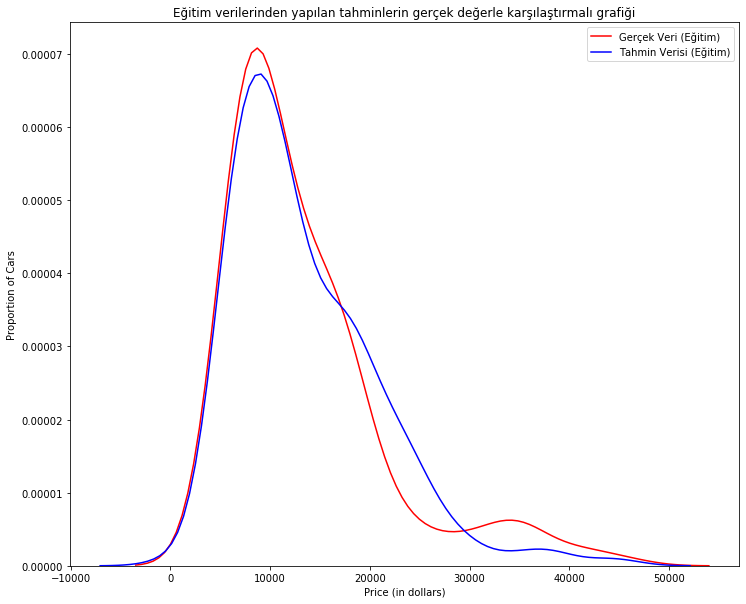

In [26]:
Title="Eğitim verilerinden yapılan tahminlerin gerçek değerle karşılaştırmalı grafiği"
DistributionPlot(y_train,yhat_train,"Gerçek Veri (Eğitim)","Tahmin Verisi (Eğitim)",Title)

Yukarıda görülebileceği gibi eğitimdeki tahminler ile gerçek veri arasındaki uyum oldukça iyi.

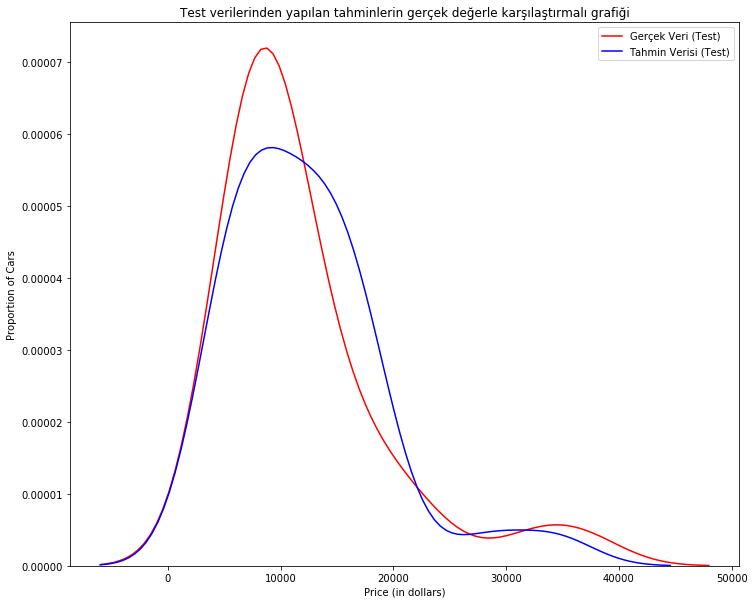

In [27]:
Title="Test verilerinden yapılan tahminlerin gerçek değerle karşılaştırmalı grafiği"
DistributionPlot(y_test,yhat_test,"Gerçek Veri (Test)","Tahmin Verisi (Test)",Title)

Test verisindeki başarımının eğtim verisine göre düşük olduğu iki grafiğin karşılaştırılmasındanda görülebiliyor. Özellikle 5000-15000 arasındaki başarım arasındaki fark oldukça bariz.

Polinom fonksyonlar için durumu inceleyelim.

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.45,random_state=0)

Beşinci dereceden polinom bir fonksiyon için model eğitelim.

In [30]:
pr=PolynomialFeatures(degree=5)
x_train_pr=pr.fit_transform(x_train[["horsepower"]]) # 5. derece polinom dönüşümü yapalım.
x_test_pr=pr.fit_transform(x_test[["horsepower"]])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [31]:
#Linear Regresyon modeli yaratıp eğitelim
poly=LinearRegression()
poly.fit(x_train_pr,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
yhat=poly.predict(x_test_pr)
yhat[0:4]

array([ 6728.65566037,  7307.9878638 , 12213.7877412 , 18893.24796457])